In [1]:
import os
import torch
import transformers.utils
from transformers import pipeline
import nltk
from nltk.tokenize import sent_tokenize
from glob import glob
import pandas as pd
import numpy as np
# Asegura que PyTorch está activado en transformers
os.environ["USE_TORCH"] = "1"
os.environ["USE_TF"] = "0"

print("PyTorch disponible en transformers:", transformers.utils.is_torch_available())

c:\Users\gaova\anaconda3\envs\chatnarutobot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch disponible en transformers: True


In [2]:
nltk.download('punkt') # Download the Punkt tokenizer for sentence splitting

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### ***LoadModel***

In [3]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else -1  # -1 fuerza CPU


In [4]:
def load_model(device):
    theme_classifier = pipeline(
        "zero-shot-classification",
        model=model_name,
        device=device
    )
    return theme_classifier

In [5]:
theme_classifier = load_model(device)

Device set to use cpu


In [6]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [7]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121254682540894,
  0.475002646446228,
  0.08781813830137253,
  0.045000508427619934,
  0.020133016631007195,
  0.012040519155561924,
  0.004292406141757965,
  0.0028172244783490896]}

### ***LoadDataset***

In [8]:
files = glob("../data/subtitles/*.ass")

In [9]:
files[:5]

['../data/subtitles\\Naruto Season 1 - 01.ass',
 '../data/subtitles\\Naruto Season 1 - 02.ass',
 '../data/subtitles\\Naruto Season 1 - 03.ass',
 '../data/subtitles\\Naruto Season 1 - 04.ass',
 '../data/subtitles\\Naruto Season 1 - 05.ass']

In [10]:
with open(files[0], 'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines = [",".join(line.split(',')[9:]) for line in lines]

In [11]:
lines[:5]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n',
 'it could smash mountains\\Nand create tidal waves.\n',
 'A band of Ninjas rose to\\Ndefend their village from attack.\n',
 'We have to wait until\\Nthe Fourth Hokage gets here!\n']

In [12]:
lines = [line.replace('\\N','') for line in lines]

In [13]:
lines[:5]

['A long time ago, a powerful demon foxappeared with nine tails.\n',
 'With its powerful tails,\n',
 'it could smash mountainsand create tidal waves.\n',
 'A band of Ninjas rose todefend their village from attack.\n',
 'We have to wait untilthe Fourth Hokage gets here!\n']

In [14]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [15]:
def load_subtitles_dataset(dataset_path):
    subtitles_path = glob(dataset_path+"/*.ass")
    
    scripts = []
    episode_num = []

    for path in subtitles_path:

    # Read Lines
        with open(path, 'r') as file:
            lines = file.readlines()
            lines = lines[27:]
            lines = [",".join(line.split(',')[9:]) for line in lines]

        lines = [line.replace('\\N','') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())

        scripts.append(script)
        episode_num.append(episode)
    
    df = pd.DataFrame.from_dict({"episode":episode_num, "script":scripts})
    return df

In [16]:
dataset_path = "../data/subtitles"
df = load_subtitles_dataset(dataset_path)


In [17]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon foxappeared ..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


### **Run Model**

In [18]:
script = df.iloc[0]['script']

In [19]:
script

'A long time ago, a powerful demon foxappeared with nine tails.\n With its powerful tails,\n it could smash mountainsand create tidal waves.\n A band of Ninjas rose todefend their village from attack.\n We have to wait untilthe Fourth Hokage gets here!\n We can\'t let it get any closerto our village!\n One great Ninja was able toimprison the monster,\n but died in the process.\n This Ninja was known as…the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you!Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed ontothe Mountainside Images…\n And he vandalized andgraffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here,lruka Sensei?\n The question is what are you doing herewhen you should be in class 

In [20]:
import nltk
from nltk.tokenize import sent_tokenize



import shutil


# Borra punkt manualmente si existe
punkt_path = os.path.join(nltk.data.find("tokenizers"), "punkt")
shutil.rmtree(punkt_path, ignore_errors=True)

# Descarga nuevamente
nltk.download('punkt')




import os

# Ver todas las rutas donde NLTK busca recursos
print("Rutas de NLTK:", nltk.data.path)

for path in nltk.data.path:
    punkt_path = os.path.join(path, "tokenizers", "punkt", "PY3", "english.pickle")
    if os.path.exists(punkt_path):
        print(f"✅ 'english.pickle' encontrado en: {punkt_path}")
    else:
        print(f"❌ No encontrado en: {punkt_path}")





Rutas de NLTK: ['C:\\Users\\gaova/nltk_data', 'c:\\Users\\gaova\\anaconda3\\envs\\chatnarutobot\\nltk_data', 'c:\\Users\\gaova\\anaconda3\\envs\\chatnarutobot\\share\\nltk_data', 'c:\\Users\\gaova\\anaconda3\\envs\\chatnarutobot\\lib\\nltk_data', 'C:\\Users\\gaova\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
❌ No encontrado en: C:\Users\gaova/nltk_data\tokenizers\punkt\PY3\english.pickle
❌ No encontrado en: c:\Users\gaova\anaconda3\envs\chatnarutobot\nltk_data\tokenizers\punkt\PY3\english.pickle
❌ No encontrado en: c:\Users\gaova\anaconda3\envs\chatnarutobot\share\nltk_data\tokenizers\punkt\PY3\english.pickle
❌ No encontrado en: c:\Users\gaova\anaconda3\envs\chatnarutobot\lib\nltk_data\tokenizers\punkt\PY3\english.pickle
❌ No encontrado en: C:\Users\gaova\AppData\Roaming\nltk_data\tokenizers\punkt\PY3\english.pickle
✅ 'english.pickle' encontrado en: C:\nltk_data\tokenizers\punkt\PY3\english.pickle
❌ No encontrado en: D:\nltk_data\tokenizers\punkt\PY

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
import nltk
import os

# Asegurar que nltk_data tiene la ruta correcta
nltk.data.path.append("C:/nltk_data")

# Descargar nuevamente
print("⬇️ Descargando modelo 'punkt' limpio...")
nltk.download("punkt", download_dir="C:/nltk_data")

print("✅ Descarga completada. Prueba ejecutar tu código otra vez.")


⬇️ Descargando modelo 'punkt' limpio...
✅ Descarga completada. Prueba ejecutar tu código otra vez.


[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.data.path.append("C:/nltk_data")  # Asegurar la ruta

# Descargar el recurso 'punkt_tab'
nltk.download('punkt_tab', download_dir="C:/nltk_data")


script_sentences = sent_tokenize(script)

print("✅ Tokenización exitosa:", script_sentences)


[nltk_data] Downloading package punkt_tab to C:/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✅ Tokenización exitosa: ['A long time ago, a powerful demon foxappeared with nine tails.', 'With its powerful tails,\n it could smash mountainsand create tidal waves.', 'A band of Ninjas rose todefend their village from attack.', 'We have to wait untilthe Fourth Hokage gets here!', "We can't let it get any closerto our village!", 'One great Ninja was able toimprison the monster,\n but died in the process.', 'This Ninja was known as…the Fourth Hokage.', 'Naruto!', 'Why did you do such a thing?!', "You're really gonna get it this time!", "I don't care!", 'You know your problem?', "You can't do the things I do!", 'Only I can do this!', "I'm better than all of you!Believe it!", "There's a problem, sir!", 'Lord Hokage!', 'What is it?', 'Did that Naruto do something again?', 'Yes.', 'He climbed ontothe Mountainside Images…\n And he vandalized andgraffitied all over them!', 'Wait!', 'Ha ha…\n Why should I?', 'Hey, Naruto!', 'How did you suddenly get here,lruka Sensei?', 'The question is what 

In [23]:
script_sentences[:3]

['A long time ago, a powerful demon foxappeared with nine tails.',
 'With its powerful tails,\n it could smash mountainsand create tidal waves.',
 'A band of Ninjas rose todefend their village from attack.']

In [24]:
#Batch Sentence
sentence_batch_size = 20
script_batches = []
for index in range(0, len(script_sentences), sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)
   

In [25]:
script_batches[:2]

["A long time ago, a powerful demon foxappeared with nine tails. With its powerful tails,\n it could smash mountainsand create tidal waves. A band of Ninjas rose todefend their village from attack. We have to wait untilthe Fourth Hokage gets here! We can't let it get any closerto our village! One great Ninja was able toimprison the monster,\n but died in the process. This Ninja was known as…the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you!Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes.",
 'He climbed ontothe Mountainside Images…\n And he vandalized andgraffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here,lruka Sensei? The question is what are you doing herewhen you should be in class now? Now listen, Naruto. You failed the last grad

In [26]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [27]:
theme_output

[{'sequence': "A long time ago, a powerful demon foxappeared with nine tails. With its powerful tails,\n it could smash mountainsand create tidal waves. A band of Ninjas rose todefend their village from attack. We have to wait untilthe Fourth Hokage gets here! We can't let it get any closerto our village! One great Ninja was able toimprison the monster,\n but died in the process. This Ninja was known as…the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you!Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes.",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'self development',
   'sacrifice',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9732495546340942,
   0.9437206387519836,
   0.84869784116745,
   0.7226597666740417,
   0.6995745897293091,
   0.15611553192138672,
 

In [28]:
#Wrangle output
theme = {}
for output in theme_output:
    for label, score in zip(output['labels'], output['scores']):
        if label not in theme:
           theme[label] = []
        theme[label].append(score)

In [29]:
themes = {key: np.mean(np.array(value)) for key, value in theme.items()}

In [30]:
themes

{'dialogue': np.float64(0.9371669590473175),
 'betrayal': np.float64(0.6308817714452744),
 'battle': np.float64(0.6780571639537811),
 'self development': np.float64(0.7520156502723694),
 'sacrifice': np.float64(0.5551392436027527),
 'hope': np.float64(0.1389283947646618),
 'friendship': np.float64(0.0607756432145834),
 'love': np.float64(0.029483945574611425)}

In [31]:
def get_theme_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size = 20
    script_batches = []
    for index in range(0, len(script_sentences), sentence_batch_size):
        sent = " ".join(script_sentences[index:index + sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches,
        theme_list,
        multi_label=True
    )

    # Wrangle output
    theme = {}
    for output in theme_output:
        for label, score in zip(output['labels'], output['scores']):
            if label not in theme:
                theme[label] = []
            theme[label].append(score)
    theme = {key: np.mean(np.array(value)) for key, value in theme.items()}

    return theme

In [32]:
df = df.head(2)

In [33]:
df

,episode,script
0,1,"A long time ago, a powerful demon foxappeared ..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."


In [34]:
output_themes = df['script'].apply(get_theme_inference)

In [35]:
output_themes

0    {'dialogue': 0.9149834939411708, 'betrayal': 0...
1    {'dialogue': 0.7904216008526939, 'sacrifice': ...
Name: script, dtype: object

In [36]:
theme_df = pd.DataFrame(output_themes.tolist())

In [37]:
df[theme_df.columns] = theme_df

In [38]:
df

,episode,script,dialogue,betrayal,battle,self development,sacrifice,hope,friendship,love
0,1,"A long time ago, a powerful demon foxappeared ...",0.914983,0.820408,0.704037,0.749671,0.709308,0.359903,0.283641,0.201032
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.790422,0.292205,0.550060,0.624064,0.547790,0.369138,0.168765,0.088975


## Visualize Output

In [41]:
df=df.drop('dialogue', axis=1)

In [44]:
theme_output = df.drop(['episode','script'], axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,1.112613
1,battle,1.254097
2,self development,1.373735
3,sacrifice,1.257099
4,hope,0.729041
5,friendship,0.452407
6,love,0.290007


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


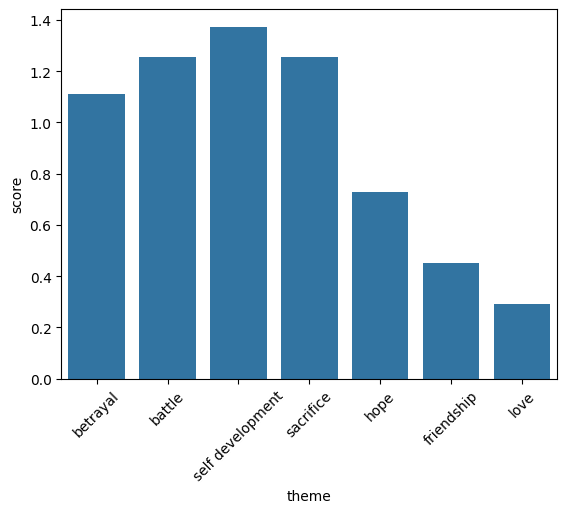

In [49]:
sns.barplot(data = theme_output, x = 'theme', y = 'score')
plt.xticks(rotation=45)
plt.show()